In [16]:
%% Load demonstrations and define paths
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
dataPath  = '../data/'; % Data path
load([dataPath 'toyExampleMSDstiffnessLearning.mat']);
path(path,'../manifolds');
path(path,'../gmm_gmr');

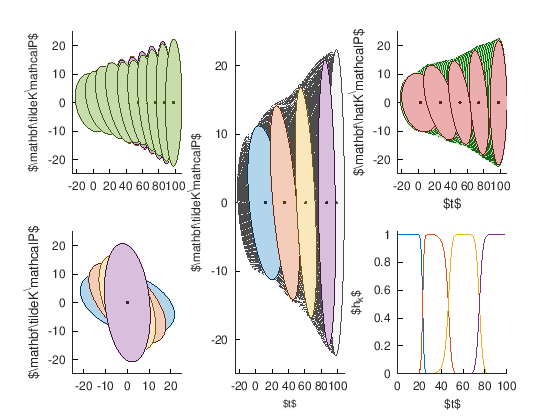

In [18]:
handel_GMM_GMR_SPD = figure;%('position',[2000,6000,600,450]); hold on;
subplot(2,3,1); hold on;
%title('Demonstrated Stiffness', 'Interpreter', 'Latex', 'Fontsize', 12);
for n=1:modelPD.nbSamples
    for i=round(linspace(1,(nbData-rdp),10))
        plotGMM2([i;0], X(4:5,4:5,i+(n-1)*(nbData-rdp)), clrmap_demos(n,:), .4);
    end
end
axis([-25, (nbData-rdp)+10, -25, 25]);
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');
ylabel('$\mathbf{\tilde{K}}^\mathcal{P}$', 'Interpreter', 'Latex', 'Fontsize', 12);
subplot(2,3,4); hold on;
%title('Rotation of GMM centers on $\mathcal{S}_+^{m}$', 'Interpreter', 'Latex', 'Fontsize', 12);
for i=1:modelPD.nbStates % Plotting GMM of man. ellipsoids
    [h, ~] = plotGMM2([0; 0], modelPD.MuMan(out,out,i), ...
        clrmapMAN_states(i,:), .3); hh{i} = h(1);
end
ylabel('$\mathbf{\tilde{K}}^\mathcal{P}$', 'Interpreter', 'Latex', 'Fontsize', 12);
axis([-25, 25, -25, 25]);
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');
subplot(2,3,[2 5]); hold on;
%title('Demonstrated Stiffness and GMM centers on $\mathcal{S}_+^{m}$', 'Interpreter', 'Latex', 'Fontsize', 12);
sc = 1/modelPD.dt;
for i=1:size(X,3) % Plotting man. ellipsoids from demonstration data
    plotGMM2([X(1,1,i)*sc; 0], X(out,out,i), [.6 .6 .6], .1);
end
for i=1:modelPD.nbStates % Plotting GMM of man. ellipsoids
    plotGMM2([modelPD.MuMan(1,1,i)*sc; 0], modelPD.MuMan(out,out,i), ...
        clrmapMAN_states(i,:), .3);
end
axis([-25, (nbData-rdp)+10, -25, 25]);
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');
ylabel('$\mathbf{\tilde{K}}^\mathcal{P}$', 'Interpreter', 'Latex', 'Fontsize', 12);
xlabel('$t$', 'Fontsize', 10, 'Interpreter', 'Latex');
figure(handel_GMM_GMR_SPD);

subplot(2,3,3); hold on;
%title('Desired Stiffness profile (GMR on $\mathcal{S}_+^{m}$)', 'Interpreter', 'Latex', 'Fontsize', 12);
for j = 6%reprosMan
    for i=round(linspace(1,nbData-rdp,50))
        plotGMM2([xInSPD(1,1,i)*sc; 0], newModelPD(j).Mu(:,:,i), [0.2 0.8 0.2], .4);
    end
end
ylabel('$\mathbf{\hat{K}}^\mathcal{P}$', 'Fontsize', 12, 'Interpreter', 'Latex');
xlabel('$t$', 'Fontsize', 12, 'Interpreter', 'Latex');
axis([-25, DataK(1,end)*sc+10, -25, 25]);
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');
% Plotting estimated stiffness ellipsoid
for j = 6
    for i=round(linspace(3,nbData-rdp,5)) 
        Mu(:,:,i) = dD(j).KP(:,:,i);    
        plotGMM2([DataK(1,i)*sc; 0], Mu(:,:,i), [0.8 0.2 0.2], .4);
    end
end
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Plotting states influence during GMR estimation
subplot(2,3,6); hold on;
%title('Influence of GMM components', 'Interpreter', 'Latex', 'Fontsize', 12);
for i=1:modelPD.nbStates
    plot(xIn*50, newModelPD(j).H(i,:),'linewidth',2,'color',clrmapMAN_states(i,:));
end
axis([0, 100, 0, 1.02]);
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');
xlabel('$t$', 'Fontsize', 12, 'Interpreter', 'Latex');
ylabel('$h_k$', 'Fontsize', 12, 'Interpreter', 'Latex');

reprpduction =  1


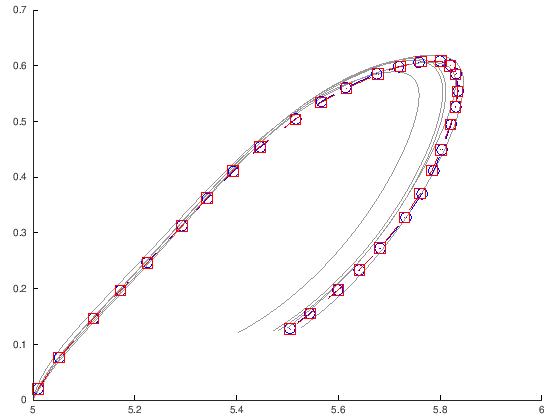

In [19]:
reprpduction=figure%('position',[2000,5000,500,200]);
hold on;
for j=1:5
    m1=1;dt=0.02;xr=[];
    for n=1:5
        %plot(dD(j).demo(n).DataP(1,:),dD(j).demo(n).DataP(2,:));
        xr = [xr dD(j).demo(n).DataP(posId,end)];
    end
    xR1  = g;                   % Rest and goal position of the mass 1 (c)
    traj(j).x1(:,1)   = xR1;            % Initial position for the mass 1
    dx1(:,1)  = zeros(2,1);     % Initial velocity for the mass 1
    ddx1(:,1) = zeros(2,1);     % Initial acceleration for the mass 1
    f1 = zeros(2,1);
    Fe = dD(j).avgFe;
    for i = 2 : nbData
        % Stiffness matrices $K_t$ estimated from least squares.
        k1 = dD(j).KP(:,:,i);
        % Solving the system, 1st the acceleration of the mass is computed
        f1(:,i-1) = k1 * ( xR1 - traj(j).x1(:,i-1) );
        ddx1(:,i) = (Fe(:,i-1) + f1(:,i-1) - D * dx1(:,i-1)) / m1;
        % Euler integration
        % Finding the velocity for the mass
        dx1(:,i)  = dx1(:,i-1) + ddx1(:,i) * dt;
        % Computing the position
        traj(j).x1(:,i) = traj(j).x1(:,i-1) + dx1(:,i) * dt;
    end
    n=1;
    for i = round(linspace(2,nbData-2,30))
        x1x(:,n) = x1(:,i);
        n = n+1;
    end
    plot(traj(j).x1(1,:),traj(j).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
for j=6%reprosCHOL
    m1=1;dt=0.02;xr=[];
    xR1  = g;
    x1(:,1)   = xR1;
    dx1(:,1)  = zeros(2,1);
    ddx1(:,1) = zeros(2,1);
    f1 = zeros(2,1);
    Fe = dD(j).avgFe;
    for i = 2:nbData-rdp
        Mu(:,:,i) = zeros(2,2);         Mu(1,1,i) = tmpModel(j).Mu(1,i);
        Mu(1,2,i) = tmpModel(j).Mu(2,i);  Mu(2,2,i) = tmpModel(j).Mu(3,i);
        k1 = Mu(:,:,i)' * Mu(:,:,i);
        f1(:,i-1) = k1 * ( x1(:,i-1) - xR1 );
        ddx1(:,i) = (Fe(:,i-1) - f1(:,i-1) - D * dx1(:,i-1)) / m1;
        dx1(:,i)  = dx1(:,i-1) + ddx1(:,i) * dt;
        x1(:,i) = x1(:,i-1) + dx1(:,i) * dt;
    end
    n=1;
    for i = round(linspace(2,nbData-2,30))
        x1x(:,n) = x1(:,i);
        n = n+1;
    end
    plot(x1x(1,:),x1x(2,:),'b--o','MarkerSize',10,'linewidth',2);
end
for j=6%reprosMan
    m1=1;dt=0.02;xr=[];
    xR1  = g;
    x1(:,1)   = xR1;
    dx1(:,1)  = zeros(2,1);
    ddx1(:,1) = zeros(2,1);
    f1 = zeros(2,1);
    Fe = dD(j).avgFe;
    for i = 2:nbData-rdp
        k1 = newModelPD(j).Mu(:,:,i);
        f1(:,i-1) = k1 * ( x1(:,i-1) - xR1 );
        ddx1(:,i) = (Fe(:,i-1) - f1(:,i-1) - D * dx1(:,i-1)) / m1;
        dx1(:,i)  = dx1(:,i-1) + ddx1(:,i) * dt;
        x1(:,i) = x1(:,i-1) + dx1(:,i) * dt;
    end
    n=1;
    for i = round(linspace(2,nbData-2,30))
        x1x(:,n) = x1(:,i);
        n = n+1;
    end
    plot(x1x(1,:),x1x(2,:),'--rs','MarkerSize',10,'linewidth',2);
end

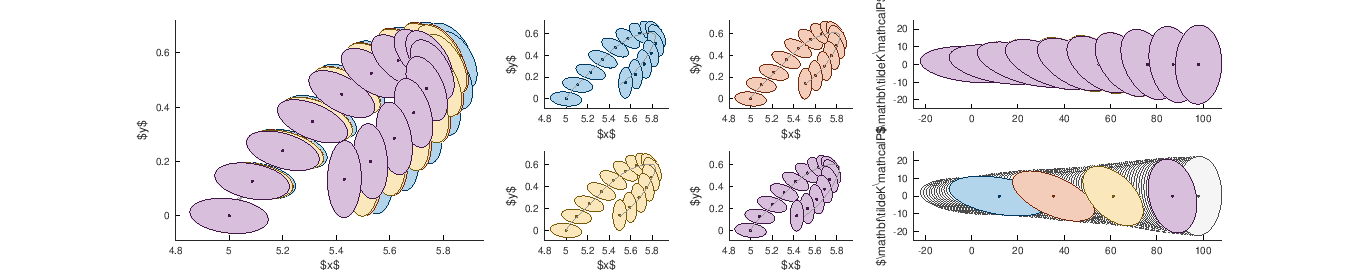

In [22]:
reprpduction=figure('position',[10 10 1350 270],'color',[1 1 1]);
subplot(2,6,[1 2 7 8]);hold on
for j=1:5
    plot(traj(j).x1(1,:),traj(j).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
clrmap = lines(5);
for n=1:4
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
end
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 12, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 12, 'Interpreter', 'Latex');

subplot(2,6,3);hold on
for n=1
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
    plot(traj(j).x1(1,:),traj(j).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 12, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 12, 'Interpreter', 'Latex');

subplot(2,6,4);hold on
for n=2
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
    plot(traj(j).x1(1,:),traj(j).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 12, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 12, 'Interpreter', 'Latex');

subplot(2,6,9);hold on
for n=3
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
    plot(traj(j).x1(1,:),traj(j).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 12, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 12, 'Interpreter', 'Latex');

subplot(2,6,10);hold on
for n=4
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
    plot(traj(j).x1(1,:),traj(j).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 12, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 12, 'Interpreter', 'Latex');

subplot(2,6,[5 6]);hold on
for n=1:4
    for i=round(linspace(1,(nbData-rdp),10))
        plotGMM2([i;0], X(4:5,4:5,i+(n-1)*(nbData-rdp)), clrmap(n,:), .3);
    end
end
axis([-25, (nbData-rdp)+10, -25, 25])
ylabel('$\mathbf{\tilde{K}}^\mathcal{P}$', 'Interpreter', 'Latex', 'Fontsize', 12);

subplot(2,6,[11 12]);hold on
sc = 1/modelPD.dt;
for i=1:size(X,3) % Plotting man. ellipsoids from demonstration data
    plotGMM2([X(1,1,i)*sc; 0], X(out,out,i), [.6 .6 .6], .1);
end
for i=1:modelPD.nbStates % Plotting GMM of man. ellipsoids
    plotGMM2([modelPD.MuMan(1,1,i)*sc; 0], modelPD.MuMan(out,out,i), ...
        clrmap(i,:), .3);
end
axis([-25, (nbData-rdp)+10, -25, 25])
ylabel('$\mathbf{\tilde{K}}^\mathcal{P}$', 'Interpreter', 'Latex', 'Fontsize', 12);